# 한국어 언어 모델 학습 및 다중 과제 튜닝

## 1. 자연어 전처리
* 전처리
  * 원시 데이터(raw data)를 기계 학습 모델이 학습하는데 적합하게 만드는 프로세스
  * 학습에 사용될 데이터를 **수집&가공**하는 모든 프로세스

* 자연어 전처리가 필요한 이유
  * task의 성능을 가장 확실하게 올릴 수 있는 방법
  * 모델을 바꾸고, 튜닝해도 데이터 자체에 문제가 있다면 성능이 나오지 않음(**데이터**가 가장 중요함)
  * 단, 데이터를 수집 또는 가공할 때 **저작권에 유의**해야함

### 1. 자연어처리의 단계
* Task 설계
* 필요 데이터 수집
* 통계학적 분석
* 전처리
* Tagging
* Tokenizing
* 모델 설계
* 모델 구현
* 성능 평가
* 완료

* Task 설계

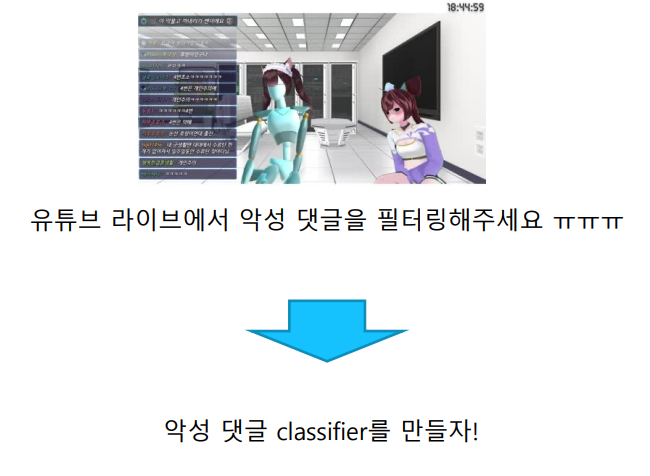

* 필요 데이터 수집

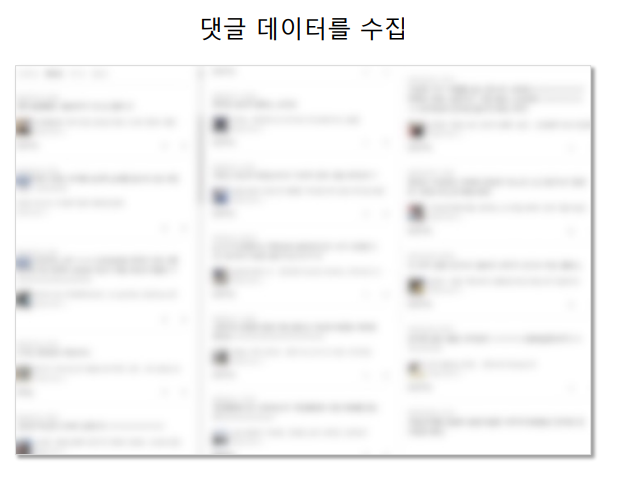

* 통계학적 분석
  * Token 개수 -> outlier 제거
     * 무의미한 token, 한글자 등 매우 짧은 token에 대해 outlier를 제거한 후 학습함
  * 빈도 확인 -> 사전(dictionary) 정의
    * 악성 댓글을 판별할 수 있는 사전 정의

* 전처리
  * 개행문자 제거
  * 특수문자 제거
  * 공백 제거
  * 중복 표현 제거 (ㅋㅋㅋㅋㅋ, ㅠㅠㅠㅠ, …)
  * 이메일, 링크 제거
  * 제목 제거
  * 불용어 (의미가 없는 용어) 제거
  * 조사 제거
  * 띄어쓰기, 문장분리 보정

* Tagging
   * 악성 댓글인지 아닌지 판별하여 tagging 작업함

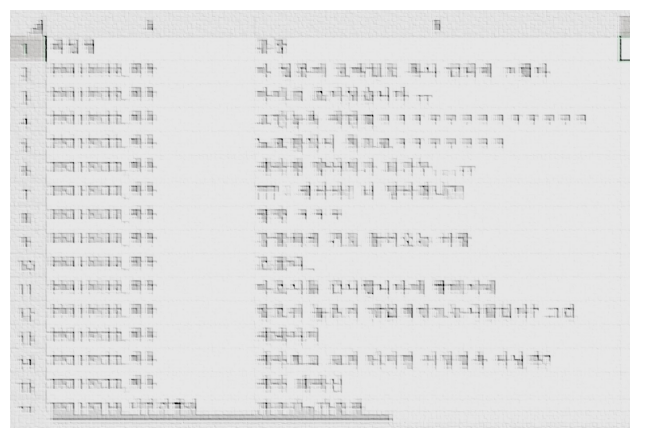


* Tokenizing
  * token의 단위를 결정함(자연어를 어떤 단위로 살펴볼 것인가)
  * 어절 tokenizing
  * 형태소 tokenizing
  * WordPiece tokenizing

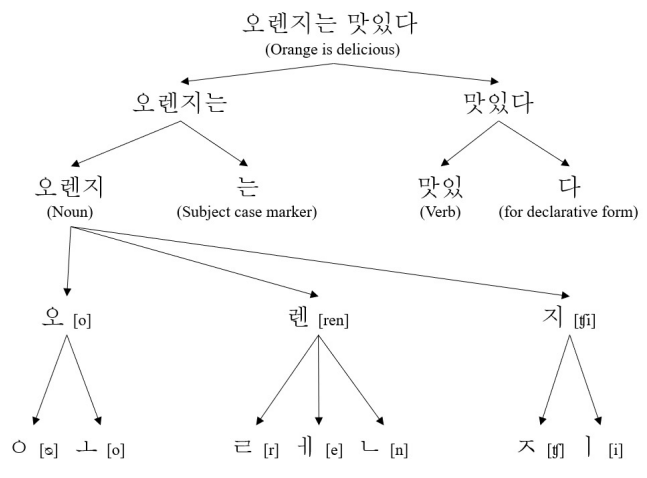

* 문맥상으로 문제가 없지만 악성 댓글인 경우가 많음
  * 실제로 task가 어떻게 적용이 되는지, application 이 어떤 환경에 적용이 되는지를 파악하고, 그에 맞는 데이터 수집 및 그 데이터에 맞춰서 설계해야함

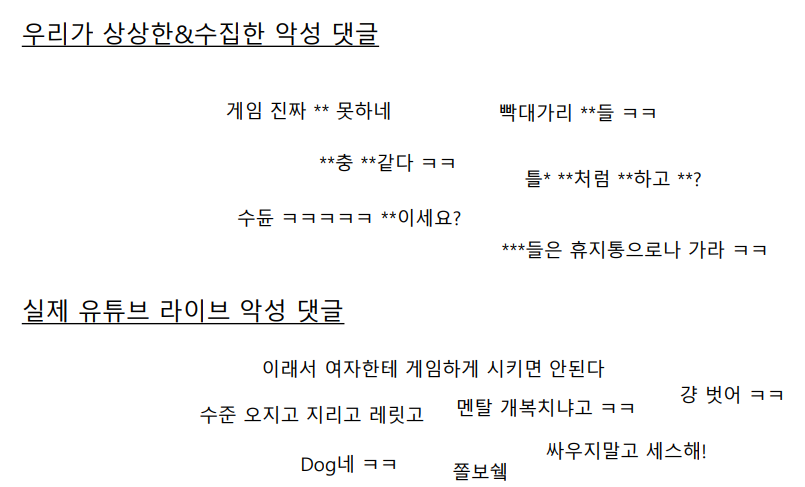

### 2. Python string 관련 함수
* 자연어 전처리를 하기 위해서는 python string 함수에 익숙해야함

* 대소문자 변환
  * `upper()` : 모두 대문자로 변환
  * `lower()` : 모두 소문자로 변환
  * `capitalize()` : 문자열의 첫 문자를 대문자로 변환
  * `title()` : 문자열에서 각 단어의 첫 문자를 대문자로 변환
  * `swapcase()` : 대문자와 소문자를 서로 변환

* 편집, 치환
  * 가장 많이 사용함
  * 크롤링을 하여 문장을 수집하면 첫 번째로 하는 전처리 : 공백 제거
  * `strip()` : 좌우 공백을 제거
  * `rstrip()` : 오른쪽 공백을 제거
  * `lstrip()` : 왼쪽 공백을 제거
  * `replace(a, b)` : a를 b로 치환

* 분리, 결합
  * `split()` : 공백으로 분리
  * `split('\t')` : 탭을 기준으로 분리
  * `''.join(s)` : 리스트 s에 대하여 각 요소 사이에 공백을 두고 결합
  * `lines.splitlines()` : 라인 단위로 분리

* 구성 문자열 판별
  * `isdigit()` : 숫자 여부 판별
  * `isalpha()` : 영어 알파벳 여부 판별
  * `isalnum()` : 숫자 혹은 영어 알파벳 여부 판별
  * `islower()` : 소문자 여부 판별
  * `isupper()` : 대문자 여부 판별
  * `isspace()` : 공백 문자 여부 판별
  * `startswith('hi')` : 문자열이 hi로 시작하는지 여부 파악
  * `endswith('hi')` : 문자열이 hi로 끝나는지 여부 파악

* 검색
  * `count('hi')` : 문자열에서 hi가 출현한 빈도 return
  * `find('hi')` : 문자열에서 hi가 처음으로 출현한 위치 return, 존재하지 않는 경우 -1 return
  * `find('hi', 3)` : 문자열에서 index가 3번인 문자부터 hi가 출현한 위치 검색
  * `rfind('hi')` : 문자열에서 오른쪽부터 검사하여 hi가 처음으로 출현한 위치 return, 존재하지 않는 경우 -1 return
  * `index('hi')` : find와 비슷한 기능을 하지만, 존재하지 않는 경우 예외 발생함
  * `rindex('hi')` : rfind와 비슷한 기능을 하지만, 존재하지 않는 경우 예외 발생함

## 2. 한국어 토큰화
* 자연어를 어떤 단위로 관찰할 것인지 결정하는 과정

### 1. 한국어 토큰화

 * 토큰화(Tokenizing)
  * 주어진 데이터를 토큰(Token)이라 불리는 단위로 나누는 작업
  * 토큰이 되는 기준은 다를 수 있음(어절, 단어, 형태소, 음절, 자소 등)

* 문장 토큰화(Sentence Tokinizing)
  * 문장 분리

* 단어 토큰화(Word Tokenizing)
  * space 단위로 분리함
  * 구두점 분리, 단어 분리
  * "Hello, World!" -> "Hello", ",", "World", "!"

* 한국어 토큰화
  * 영어는 New York과 같은 합성어 처리와 it's와 같은 줄임말 예외처리만 하면, 띄어쓰기 기준으로 잘 동작하는 편임
  * 한국어는 조사나 어미를 붙여서 말을 만드는 교착어로, 띄어쓰기만으로는 부족함
    * ex) he/him -> 그, 그가, 그는, 그를 , 그에게
  * 한국어에서는 어절이 의미를 가지는 최소 단위인 형태소로 분리
    * ex) 안녕하세요 -> 안녕/NNG, 하/XSA, 세/EP, 요/EC